[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-mmlab/mmtracking/blob/master/demo/MMTracking_Tutorial.ipynb)

# **Welcome to MMTracking**

In this tutorial, you will learn to:
+ Install MMTracking.
+ Perform inference with pretrained weights in MMTracking.
+ Train a new MOT model with a toy dataset.
Let's start!

## **Install MMTracking**

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

# install MMDetection
!pip install mmdet

# clone the MMTracking repository
!git clone https://github.com/open-mmlab/mmtracking.git
%cd mmtracking

# install MMTracking and its dependencies
!pip install -r requirements/build.txt
!pip install -e .
# used to MOT evaluation
!pip install git+https://github.com/JonathonLuiten/TrackEval.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 27.0 MB/s eta 0:00:00
  Created wheel for mmcv-full: filename=mmcv_full-1.7.1-cp310-cp310-linux_x86_64.whl size=34514484 sha256=56cc0a4382e6a6bf4d720ff41e0663d5090c417270becbfbea6fddb59bd58504
  Stored in directory: /root/.cache/pip/wheels/47/9a/65/470be18e21a8f2d085a024f0731508273543de0b5f79d9ddd4
Successfully built mmcv-full
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from mmcv import collect_env
collect_env()

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


{'sys.platform': 'linux',
 'Python': '3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla T4',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 11.8, V11.8.89',
 'GCC': 'x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0',
 'PyTorch': '2.0.1+cu118',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201703\n  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.8\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencod

In [1]:
!pip install mmengine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!echo y |pip uninstall mmdet

Found existing installation: mmdet 3.0.0
Uninstalling mmdet-3.0.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/mmdet-3.0.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/mmdet/*
Proceed (Y/n)?   Successfully uninstalled mmdet-3.0.0


In [11]:
!pip install mmdet==2.26.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.9 MB/s eta 0:00:00


In [2]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check MMTracking installation
import mmtrack
print(mmtrack.__version__)

2.0.1+cu118 True
11.8
GCC 9.4
2.26.0
0.14.0


/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


## **Perform inference**

In [3]:
# unset the proxy for downloading the pretrained models (optional)
!unset https_proxy
!unset http_proxy

# download checkpoints
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmtracking/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth -P ./checkpoints
!wget -c https://download.openmmlab.com/mmtracking/sot/siamese_rpn/siamese_rpn_r50_1x_lasot/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth -P ./checkpoints
!wget -c https://download.openmmlab.com/mmtracking/vis/masktrack_rcnn/masktrack_rcnn_r50_fpn_12e_youtubevis2019/masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth -P ./checkpoints

--2023-06-20 13:55:05--  https://download.openmmlab.com/mmtracking/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.212, 8.48.85.211, 8.48.85.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282801031 (270M) [application/octet-stream]
Saving to: ‘./checkpoints/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth’

selsa_faster_rcnn_r 100%[===================>] 269.70M  31.4MB/s    in 8.6s    

2023-06-20 13:55:15 (31.2 MB/s) - ‘./checkpoints/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth’ saved [282801031/282801031]

--2023-06-20 13:55:15--  https://download.openmmlab.com/mmtracking/sot/siamese_rpn/siamese_rpn_r50_1x_lasot/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
Resolving download.openmml

In [6]:
%cd mmtracking

/content/mmtracking


In [7]:
# run mot demo
import mmcv
import tempfile
from mmtrack.apis import inference_mot, init_model
mot_config = './configs/mot/deepsort/deepsort_faster-rcnn_fpn_4e_mot17-private-half.py'
input_video = './demo/demo.mp4'
imgs = mmcv.VideoReader(input_video)
# build the model from a config file
mot_model = init_model(mot_config, device='cuda:0')
prog_bar = mmcv.ProgressBar(len(imgs))
out_dir = tempfile.TemporaryDirectory()
out_path = out_dir.name
# test and show/save the images
for i, img in enumerate(imgs):
    result = inference_mot(mot_model, img, frame_id=i)
    mot_model.show_result(
            img,
            result,
            show=False,
            wait_time=int(1000. / imgs.fps),
            out_file=f'{out_path}/{i:06d}.jpg')
    prog_bar.update()

output = './demo/mot.mp4'
print(f'\n making the output video at {output} with a FPS of {imgs.fps}')
mmcv.frames2video(out_path, output, fps=imgs.fps, fourcc='mp4v')
out_dir.cleanup()

2023-06-20 13:56:01,981 - mmcv - INFO - initialize FasterRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth'}
2023-06-20 13:56:01,983 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth
2023-06-20 13:56:01,986 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth
Downloading: "https://download.openmmlab.com/mmtracking/mot/faster_rcnn/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth" to /root/.cache/torch/hub/checkpoints/faster-rcnn_r50_fpn_4e_mot17-half-64ee2ed4.pth
100%|██████████| 158M/158M [00:05<00:00, 29.7MB/s]
2023-06-20 13:56:08,309 - mmcv - INFO - initialize BaseReID with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/mot/reid/tracktor_reid_r50_ite

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 0.9 task/s, elapsed: 9s, ETA:     0s
 making the output video at ./demo/mot.mp4 with a FPS of 3.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 12.4 task/s, elapsed: 1s, ETA:     0s


In [57]:
# run vis demo
from mmtrack.apis import inference_mot
vis_config = './configs/vis/masktrack_rcnn/masktrack_rcnn_r50_fpn_12e_youtubevis2019.py'
vis_checkpoint = './checkpoints/masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth'
# build the model from a config file and a checkpoint file
vis_model = init_model(vis_config, vis_checkpoint, device='cuda:0')
imgs = mmcv.VideoReader(input_video)
prog_bar = mmcv.ProgressBar(len(imgs))
out_dir = tempfile.TemporaryDirectory()
out_path = out_dir.name
for i, img in enumerate(imgs):
    result = inference_mot(vis_model, img, frame_id=i)
    vis_model.show_result(
            img,
            result,
            wait_time=int(1000. / imgs.fps),
            out_file=f'{out_path}/{i:06d}.jpg')
    prog_bar.update()
output = './demo/vis.mp4'
print(f'\n making the output video at {output} with a FPS of {imgs.fps}')
mmcv.frames2video(out_path, output, fps=imgs.fps, fourcc='mp4v')
out_dir.cleanup()

2023-06-20 15:36:03,231 - mmcv - INFO - initialize MaskRCNN with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth'}
2023-06-20 15:36:03,236 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
2023-06-20 15:36:03,239 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
2023-06-20 15:36:03,410 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([41, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81

load checkpoint from local path: ./checkpoints/masktrack_rcnn_r50_fpn_12e_youtubevis2019_20211022_194830-6ca6b91e.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 5.5 task/s, elapsed: 65s, ETA:     0s
 making the output video at ./demo/vis.mp4 with a FPS of 30.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 20.3 task/s, elapsed: 18s, ETA:     0s


test another mot model this to be exact https://github.com/open-mmlab/mmtracking/tree/master/configs/mot/ocsort

In [59]:
!wget -c https://download.openmmlab.com/mmtracking/mot/ocsort/mot_dataset/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth -P ./checkpoints

--2023-06-20 15:53:38--  https://download.openmmlab.com/mmtracking/mot/ocsort/mot_dataset/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.208, 8.48.85.210, 8.48.85.214, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793160414 (756M) [application/octet-stream]
Saving to: ‘./checkpoints/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth’

ocsort_yolox_x_crow 100%[===================>] 756.42M  22.8MB/s    in 40s     

2023-06-20 15:54:25 (19.0 MB/s) - ‘./checkpoints/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth’ saved [793160414/793160414]



In [66]:
# run vis demo
from mmtrack.apis import inference_mot
vis_config = './configs/mot/ocsort/ocsort_yolox_x_crowdhuman_mot17-private-half.py'
#vis_checkpoint = './checkpoints/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth'
# build the model from a config file and a checkpoint file
vis_model = init_model(vis_config, vis_checkpoint, device='cuda:0')
imgs = mmcv.VideoReader(input_video)
prog_bar = mmcv.ProgressBar(len(imgs))
out_dir = tempfile.TemporaryDirectory()
out_path = out_dir.name
for i, img in enumerate(imgs):
    result = inference_mot(vis_model, img, frame_id=i)
    vis_model.show_result(
            img,
            result,
            wait_time=int(1000. / imgs.fps),
            out_file=f'{out_path}/{i:06d}.jpg')
    prog_bar.update()
output = './demo/vis.mp4'
print(f'\n making the output video at {output} with a FPS of {imgs.fps}')
mmcv.frames2video(out_path, output, fps=imgs.fps, fourcc='mp4v')
out_dir.cleanup()

2023-06-20 16:10:13,613 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2023-06-20 16:10:13,679 - mmcv - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/mot/ocsort/mot_dataset/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth'}
2023-06-20 16:10:13,682 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/mot/ocsort/mot_dataset/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth
2023-06-20 16:10:13,687 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/mot/ocsort/mot_dataset/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth
Downloading: "https://download.openmmlab.com/mmtracking/mot/ocsort/mot_dataset/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth" to /root/.cache/torch/hub/checkpoints/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_10

load checkpoint from local path: ./checkpoints/ocsort_yolox_x_crowdhuman_mot17-private-half_20220813_101618-fe150582.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_bac

KeyboardInterrupt: ignored

In [67]:
print(result)

{'det_bboxes': [array([], shape=(0, 5), dtype=float32)], 'track_bboxes': [array([], shape=(0, 6), dtype=float32)]}


In [62]:
# run vid demo
from mmtrack.apis import inference_vid
vid_config = './configs/vid/selsa/selsa_faster_rcnn_r50_dc5_1x_imagenetvid.py'
vid_checkpoint = './checkpoints/selsa_faster_rcnn_r50_dc5_1x_imagenetvid_20201227_204835-2f5a4952.pth'
# build the model from a config file and a checkpoint file
vid_model = init_model(vid_config, device='cuda:0')
imgs = mmcv.VideoReader(input_video)
prog_bar = mmcv.ProgressBar(len(imgs))
out_dir = tempfile.TemporaryDirectory()
out_path = out_dir.name
for i, img in enumerate(imgs):
    result = inference_vid(vid_model, img, frame_id=i)
    vid_model.show_result(
            img,
            result,
            wait_time=int(1000. / imgs.fps),
            out_file=f'{out_path}/{i:06d}.jpg')
    prog_bar.update()
output = './demo/vid.mp4'
print(f'\n making the output video at {output} with a FPS of {imgs.fps}')
mmcv.frames2video(out_path, output, fps=imgs.fps, fourcc='mp4v')
out_dir.cleanup()

2023-06-20 16:02:36,687 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2023-06-20 16:02:36,688 - mmcv - INFO - load model from: torchvision://resnet50
2023-06-20 16:02:36,691 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2023-06-20 16:02:37,548 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2023-06-20 16:02:37,578 - mmcv - INFO - initialize ChannelMapper with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2023-06-20 16:02:37,655 - mmcv - INFO - initialize RPNHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01}
2023-06-20 16:02:37,675 - mmcv - INFO - initialize SelsaBBoxHead with init_cfg [{'type': 'Normal', 'std': 0.01, 'override': {'name': 'fc_cls'}}, {'type': 'Normal', 'std': 0.001, 'override': {'name': 'fc_reg'}}, {'type': 'Xavier', 'distribution': 'uniform', 'ove

[                                                  ] 0/362, elapsed: 0s, ETA:

/content/mmtracking/mmtrack/datasets/pipelines/formatting.py:137: UserWarning: The 'ConcatVideoReferences' class will be deprecated in the future, please use 'ConcatSameTypeFrames' instead
  warnings.warn(


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 3.5 task/s, elapsed: 105s, ETA:     0s
 making the output video at ./demo/vid.mp4 with a FPS of 30.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 20.0 task/s, elapsed: 18s, ETA:     0s


show the pixels of the initial image to get an idea of a good bbox

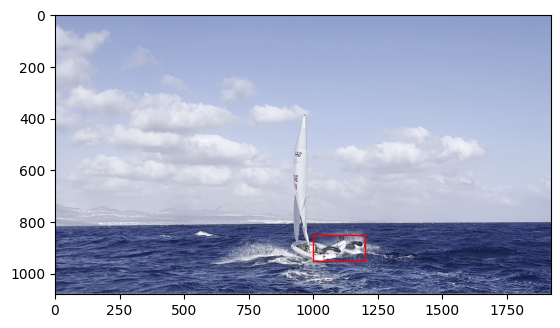

In [50]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ipywidgets import widgets
from IPython.display import display
from google.colab.patches import cv2_imshow
#           x1     y1       x2    y2
init_bbox = [1000, 850, 1200, 950]
input_video = "/content/drive/My Drive/Sailing Project RISE/470Hiking.mov"


# Load the video
video = cv2.VideoCapture(input_video)

# Get the first frame of the video
ret, frame = video.read()

# Convert to RGB for matplotlib
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Prepare figure
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(frame)

rectangle = Rectangle((init_bbox[0],init_bbox[1]),(init_bbox[2]-init_bbox[0]),(init_bbox[3]-init_bbox[1]),linewidth=1,edgecolor='r',facecolor='none')

# Draw the rectangle on the image
ax.add_patch(rectangle)

# Show the figure
plt.show()

video.release()


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
# run sot demo
#input_video = "./demo/demo.mp4"
from mmtrack.apis import inference_sot
sot_config = './configs/sot/siamese_rpn/siamese_rpn_r50_20e_lasot.py'
sot_checkpoint = './checkpoints/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth'
# build the model from a config file and a checkpoint file
sot_model = init_model(sot_config, sot_checkpoint, device='cuda:0')
#xstart ystart xend yend?

imgs = mmcv.VideoReader(input_video)
prog_bar = mmcv.ProgressBar(len(imgs))
out_dir = tempfile.TemporaryDirectory()
out_path = out_dir.name
result_lst = []
for i, img in enumerate(imgs):
    result = inference_sot(sot_model, img, init_bbox, frame_id=i)
    sot_model.show_result(
            img,
            result,
            wait_time=int(1000. / imgs.fps),
            out_file=f'{out_path}/{i:06d}.jpg')
    prog_bar.update()
    result_lst.append(result)
output = './demo/sot.mp4'
print(f'\n making the output video at {output} with a FPS of {imgs.fps}')
mmcv.frames2video(out_path, output, fps=imgs.fps, fourcc='mp4v')
out_dir.cleanup()

2023-06-20 15:06:45,668 - mmcv - INFO - initialize SOTResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model'}
2023-06-20 15:06:45,669 - mmcv - INFO - load model from: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model
2023-06-20 15:06:45,671 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmtracking/pretrained_weights/sot_resnet50.model


load checkpoint from local path: ./checkpoints/siamese_rpn_r50_1x_lasot_20211203_151612-da4b3c66.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 7.0 task/s, elapsed: 52s, ETA:     0s
 making the output video at ./demo/sot.mp4 with a FPS of 30.0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 362/362, 20.6 task/s, elapsed: 18s, ETA:     0s


In [55]:
#rename the key to bbox which is what PCT expects
#my_dict[new_key] = my_dict.pop(old_key)
for elem in result_lst:
  elem["bbox"] = elem.pop("track_bboxes")

In [56]:
import pickle
#save it
with open('bbox_data.pkl', 'wb') as f:
    pickle.dump(result_lst, f)

In [53]:
%ls

bbox_data.pkl  demo/    MANIFEST.in        README.md         resources/  tools/
checkpoints/   docker/  mmtrack/           README_zh-CN.md   setup.cfg
CITATION.cff   docs/    mmtrack.egg-info/  requirements/     setup.py
configs/       LICENSE  model-index.yml    requirements.txt  tests/


In [49]:
result_lst

[{'bbox': array([ 1.0e+03,  8.5e+02,  1.2e+03,  9.5e+02, -1.0e+00])},
 {'bbox': array([1.0271478e+03, 9.6511182e+02, 1.2080155e+03, 1.0756798e+03,
         7.5049007e-01], dtype=float32)},
 {'bbox': array([1.0351007e+03, 9.6719269e+02, 1.2007518e+03, 1.0839666e+03,
         7.7524298e-01], dtype=float32)},
 {'bbox': array([1.0434723e+03, 9.6608301e+02, 1.1958673e+03, 1.0867939e+03,
         8.6803019e-01], dtype=float32)},
 {'bbox': array([1.0507362e+03, 9.6809216e+02, 1.1923378e+03, 1.0901093e+03,
         8.5903949e-01], dtype=float32)},
 {'bbox': array([1.0571786e+03, 9.6732220e+02, 1.1910656e+03, 1.0893555e+03,
         8.2386965e-01], dtype=float32)},
 {'bbox': array([1.0937324e+03, 9.6312518e+02, 1.2125964e+03, 1.0908329e+03,
         8.8567710e-01], dtype=float32)},
 {'bbox': array([1.0996210e+03, 9.6147852e+02, 1.2075958e+03, 1.0911323e+03,
         8.9694411e-01], dtype=float32)}]

## **Train a MOT model with a toy dataset**

### **Prepare dataset**

In [ ]:
!mkdir data
!wget https://download.openmmlab.com/mmtracking/data/MOT17_tiny.zip -P ./data
!unzip -q ./data/MOT17_tiny.zip -d ./data

In [ ]:
# convert the dataset to coco format
!python ./tools/convert_datasets/mot/mot2coco.py -i ./data/MOT17_tiny/ -o ./data/MOT17_tiny/annotations --split-train --convert-det
# crop pedestrian patches from the original dataset for training reid model. It may take a few minutes.
!rm -rf ./data/MOT17_tiny/reid
!python ./tools/convert_datasets/mot/mot2reid.py -i ./data/MOT17_tiny/ -o ./data/MOT17_tiny/reid --val-split 0.9 --vis-threshold 0.8

### **Train a detector for MOT**

In [ ]:
import mmcv
from mmdet.apis import set_random_seed
cfg = mmcv.Config.fromfile('./configs/det/faster-rcnn_r50_fpn_4e_mot17-half.py')
cfg.data_root = 'data/MOT17_tiny/'
cfg.data.test.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.train.ann_file = cfg.data.train.ann_file.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.val.ann_file = cfg.data.val.ann_file.replace('data/MOT17/','data/MOT17_tiny/')

cfg.data.test.img_prefix = cfg.data.test.img_prefix.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.train.img_prefix = cfg.data.train.img_prefix.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.val.img_prefix = cfg.data.val.img_prefix.replace('data/MOT17/','data/MOT17_tiny/')

cfg.work_dir = './tutorial_exps/detector'
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
print(f'Config:\n{cfg.pretty_text}')

In [ ]:
import os.path as osp

from mmtrack.datasets import build_dataset
from mmdet.apis import train_detector as train_model
from mmdet.models import build_detector as build_model

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
model = build_model(cfg.model.detector)
model.init_weights()
datasets = [build_dataset(cfg.data.train)]
model.CLASSES = datasets[0].CLASSES
train_model(model, datasets, cfg)

### **Train a ReID model for MOT**

In [ ]:
import mmcv
from mmdet.apis import set_random_seed
cfg = mmcv.Config.fromfile('./configs/reid/resnet50_b32x8_MOT17.py')
cfg.data_root = 'data/MOT17_tiny/'
cfg.data.test.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.train.ann_file = 'data/MOT17_tiny/reid/meta/train_9.txt'
cfg.data.val.ann_file = cfg.data.val.ann_file.replace('data/MOT17/','data/MOT17_tiny/')

cfg.data.test.data_prefix = cfg.data.test.data_prefix.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.train.data_prefix = cfg.data.train.data_prefix.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.val.data_prefix = cfg.data.val.data_prefix.replace('data/MOT17/','data/MOT17_tiny/')

# learning policy
cfg.lr_config = dict(
    policy='step',
    warmup='linear',
    warmup_iters=200,
    warmup_ratio=1.0 / 200,
    step=[1])
cfg.total_epochs = 2

cfg.work_dir = './tutorial_exps/reid'
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
print(f'Config:\n{cfg.pretty_text}')

In [ ]:
from mmtrack.datasets import build_dataset
from mmdet.apis import train_detector as train_model
from mmtrack.models import build_reid as build_model


model = build_model(cfg.model.reid)
model.init_weights()
datasets = [build_dataset(cfg.data.train)]
model.CLASSES = datasets[0].CLASSES

train_model(model, datasets, cfg)

### **Test the DeepSORT model**

In [ ]:
import mmcv
from mmdet.apis import set_random_seed
cfg = mmcv.Config.fromfile('./configs/mot/deepsort/deepsort_faster-rcnn_fpn_4e_mot17-private-half.py')
cfg.data_root = 'data/MOT17_tiny/'
cfg.data.test.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.train.ann_file = cfg.data.test.ann_file.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.val.ann_file = cfg.data.val.ann_file.replace('data/MOT17/','data/MOT17_tiny/')

cfg.data.test.img_prefix = cfg.data.test.img_prefix.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.train.img_prefix = cfg.data.train.img_prefix.replace('data/MOT17/','data/MOT17_tiny/')
cfg.data.val.img_prefix = cfg.data.val.img_prefix.replace('data/MOT17/','data/MOT17_tiny/')

cfg.model.detector.init_cfg.checkpoint = './tutorial_exps/detector/epoch_4.pth'
cfg.model.reid.init_cfg.checkpoint = './tutorial_exps/reid/epoch_2.pth'

cfg.work_dir = './tutorial_exps'
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.data.test.test_mode = True
print(f'Config:\n{cfg.pretty_text}')

In [ ]:
from mmtrack.datasets import build_dataloader
from mmtrack.apis import init_model
from mmcv.parallel import MMDataParallel
from mmtrack.apis import single_gpu_test
from mmtrack.datasets import build_dataset

dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
    dataset,
    samples_per_gpu=1,
    workers_per_gpu=cfg.data.workers_per_gpu,
    dist=False,
    shuffle=False)

# build the model and load checkpoint
model = init_model(cfg)

model = MMDataParallel(model, device_ids=cfg.gpu_ids)
outputs = single_gpu_test(model, data_loader)

eval_kwargs = cfg.get('evaluation', {}).copy()
# hard-code way to remove EvalHook args
eval_hook_args = [
    'interval', 'tmpdir', 'start', 'gpu_collect', 'save_best',
    'rule', 'by_epoch'
]
for key in eval_hook_args:
    eval_kwargs.pop(key, None)
eval_kwargs.update(dict(metric=['track']))
metric = dataset.evaluate(outputs, **eval_kwargs)
print(metric)